# Confidence Interval

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/Usuario/Desktop/proyectos/Analisis_Financiero_1/Datasets/portfolio_data.csv', index_col=0, parse_dates=True)
print(data.head())

                  AMZN        DPZ         BTC       NFLX
Date                                                    
2013-05-01  248.229996  51.190983  106.250000  30.415714
2013-05-02  252.550003  51.987320   98.099998  30.641428
2013-05-03  258.049988  52.446388  112.900002  30.492857
2013-05-06  255.720001  53.205257  109.599998  30.098572
2013-05-07  257.730011  54.151505  113.199997  29.464285


## Estimate the average stock return with 90% Confidence Interval

In [3]:
# we will use log return for average stock return of Microsoft

data['logReturn'] = np.log(data['NFLX'].shift(-1)) - np.log(data['NFLX'])
data['logReturn']

Date
2013-05-01    0.007394
2013-05-02   -0.004860
2013-05-03   -0.013015
2013-05-06   -0.021299
2013-05-07    0.011377
                ...   
2019-05-08   -0.004456
2019-05-09   -0.004725
2019-05-10   -0.044691
2019-05-13    0.001013
2019-05-14         NaN
Name: logReturn, Length: 1520, dtype: float64

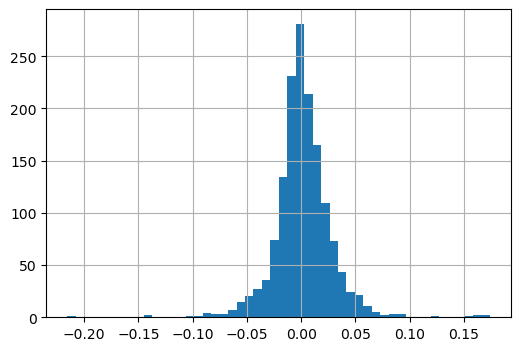

In [4]:
data['logReturn'].hist(bins=50, figsize=(6, 4))   # bins : intervalos en los que se divide el rango de datos para contar las frecuencias de los valores.
plt.show()

**Intervalo de Confianza del 90%**

Este intervalo te da un rango dentro del cual, con un 90% de certeza, se espera que caiga el valor real de un parámetro (como el rendimiento de las ganancias de una empresa). En otras palabras, si repites el cálculo muchas veces, en el 90% de los casos el valor real estará dentro de este intervalo.

**Nivel de Significancia del 10%**

El nivel de significancia (α) es la probabilidad de que el valor real esté fuera del intervalo de confianza. En este caso, 10% significa que hay un 10% de probabilidad de que el valor real no esté dentro del intervalo y esté fuera de los límites.

El nivel de significancia (α) de una prueba estadística se refiere a la probabilidad de cometer un error tipo I (rechazar una hipótesis nula que es verdadera). Este nivel de significancia se distribuye generalmente entre las colas de una distribución de probabilidad, dependiendo del tipo de prueba que estamos realizando

¿El 5% inferior de la cola y el 5% superior de la cola se interpretan de la misma manera?
En términos generales, sí, pero con matices importantes dependiendo del contexto:

*-5% Inferior de la Cola:*

Este es el lado izquierdo de la distribución, que corresponde al 5% de probabilidad más baja.
Si estamos hablando de un intervalo de confianza del 90%, el 5% inferior de la cola corresponde a la probabilidad de que el valor real (por ejemplo, el rendimiento de las ganancias de una empresa) sea menor que el límite inferior del intervalo de confianza.
Interpretación: Hay un 5% de probabilidad de que el valor real esté por debajo de este límite inferior.

*-5% Superior de la Cola:*

Este es el lado derecho de la distribución, que corresponde al 5% de probabilidad más alta.
En el mismo intervalo de confianza del 90%, el 5% superior de la cola corresponde a la probabilidad de que el valor real sea mayor que el límite superior del intervalo de confianza.
Interpretación: Hay un 5% de probabilidad de que el valor real esté por encima de este límite superior.

In [5]:
# Lets build 90% confidence interval for log return
sample_size = data['logReturn'].shape[0]
sample_mean = data['logReturn'].mean()
sample_std = data['logReturn'].std(ddof=1) / sample_size**0.5

# left and right quantile
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)

# upper and lower bound
interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std

In [6]:
# 90% confidence interval tells you that there will be 90% chance that the average stock return lies between "interval_left"
# and "interval_right".

print("sample_size = ",sample_size)
print("sample_mean = ",sample_mean)
print("sample_std = ",sample_std)
print("********************************************")
print("90% confidence interval is: interval_left =",interval_left,"interval_right =",interval_right)

sample_size =  1520
sample_mean =  0.0015999681010789339
sample_std =  0.0006810790678050396
********************************************
90% confidence interval is: interval_left = 0.0007271301554737284 interval_right = 0.0024728060466841393


** Expected output: ** 90% confidence interval is  (-1.5603253899378836e-05, 0.001656066226145423)